In [2]:
#     API Quandl
#     Data cleanup
#     Materials = XLB
#     Real Estate = RWR
#     Technology = XLK
#     S&P500 = SPY

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import os
import seaborn as sns
from dotenv import load_dotenv

%matplotlib inline

In [4]:
#QUANDL Data retrieval

#Load quandl api_key
load_dotenv()

api_key = os.getenv("QUANDL_API_KEY")
type(api_key)



str

In [5]:
#Create request url to access quandl to get prices for XLB, S&P Materials Sector ETF

#request_url = "https://www.quandl.com/api/v3/datasets/WIKI/XLB.json?api_key="
request_url = "https://www.quandl.com/api/v3/datasets/WIKI/RWR/data.csv?api_key="

# Concatenate request_url and api_key. Store as new variable
request_url_api = request_url + api_key


In [6]:
# Execute get request, this returned error, XLB, RWR, and XLK not in free wiki dataset.

response_data = requests.get(request_url_api)
response_data.content

b'code,message\nQECx02,You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.\n'

In [7]:
#Try ALPACA data retrieval next
load_dotenv()

APCA_API_KEY_ID = os.getenv("APCA_API_KEY_ID")
APCA_SECRET_KEY = os.getenv("APCA_SECRET_KEY")

api = tradeapi.REST(APCA_API_KEY_ID, APCA_SECRET_KEY, api_version='v2')

type(APCA_API_KEY_ID)


str

In [8]:
#Use alpha vantage to get historic quotes for XLB,XLK,RWR. This goes back 20 years.

xlb_df = api.alpha_vantage.historic_quotes('XLB', adjusted=True, output_format='pandas')
#xlb_df.head()

xlk_df = api.alpha_vantage.historic_quotes('XLK', adjusted=True, output_format='pandas')
# xlk_df.tail()

rwr_df = api.alpha_vantage.historic_quotes('RWR', adjusted=True, output_format='pandas')
#rwr_df.head()

#Use alpha vantage to get historic quotes for S&P500. Will need this later.

spy_df = api.alpha_vantage.historic_quotes('SPY', adjusted=True, output_format='pandas')



#CODE BELOW WAS FIRST ATTEMPT BUT ONLY GETS 1000 TRADING DAYS:

# # Get daily price data for XLB over the last 1000 trading days. Max alpaca would allow.
# #download direct into dataframe

# barset = api.get_barset('XLB', 'day', limit=1000).df
# xlb_bars_df = barset['XLB']
# xlb_bars_df.head()
# xlb_bars_df.tail()

# Get daily price data for XLK over the last 1000 trading days. Max alpaca would allow.

# barset = api.get_barset('XLK', 'day', limit=1000).df
# xlk_bars_df = barset['XLK']
# xlk_bars_df.head()
# xlk_bars_df.tail()

# # Get daily price data for RWR over the last 1000 trading days. Max alpaca would allow.

# barset = api.get_barset('RWR', 'day', limit=1000).df
# rwr_bars_df = barset['RWR']
# rwr_bars_df.head()
# rwr_bars_df.tail()





In [9]:
spy_df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2020-04-29,291.53,294.88,290.41,293.21,293.21,118066585.0,0.0,1.0
2020-04-28,291.02,291.40,285.40,285.73,285.73,104797847.0,0.0,1.0
2020-04-27,285.12,288.27,284.62,287.05,287.05,77516422.0,0.0,1.0
2020-04-24,280.73,283.70,278.50,282.97,282.97,85042563.0,0.0,1.0
2020-04-23,280.49,283.94,278.75,279.08,279.08,103685412.0,0.0,1.0


In [10]:
#DATA CLEANUP

#Select the one column we need,  "adjusted close", and drop the others

xlb_df = xlb_df['5. adjusted close']
xlb_df.head()

xlk_df = xlk_df['5. adjusted close']
xlk_df.head()

rwr_df = rwr_df['5. adjusted close']
rwr_df.head()

spy_df = spy_df['5. adjusted close']
spy_df.head()

#Use concat to put the data in one dataframe
concat_df = pd.concat([xlb_df, xlk_df, rwr_df, spy_df], axis = "columns", join = "inner")
concat_df.head()



,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close
date,,,,
2020-04-29,53.47,91.82,79.10,293.21
2020-04-28,52.14,88.20,77.38,285.73
2020-04-27,51.19,89.39,76.08,287.05
2020-04-24,49.86,88.63,73.25,282.97
2020-04-23,49.09,86.79,72.68,279.08


In [11]:
#Change column names to avoid confusion
columns = ['XLB close', 'XLK close', 'RWR close', 'SPY close']
concat_df.columns = columns
concat_df.head()

,XLB close,XLK close,RWR close,SPY close
date,,,,
2020-04-29,53.47,91.82,79.10,293.21
2020-04-28,52.14,88.20,77.38,285.73
2020-04-27,51.19,89.39,76.08,287.05
2020-04-24,49.86,88.63,73.25,282.97
2020-04-23,49.09,86.79,72.68,279.08


In [12]:
#Sort earliest to latest so that .pct_change() function works right

concat_df.sort_index(inplace=True, ascending=True)
concat_df.head()


,XLB close,XLK close,RWR close,SPY close
date,,,,
2001-08-27,14.5697,19.3468,19.2651,82.1301
2001-08-28,14.4324,18.8107,19.2651,80.9499
2001-08-29,14.2494,18.4533,18.8996,80.1862
2001-08-30,14.1971,17.7384,18.8082,78.6589
2001-08-31,14.3213,17.8861,18.7625,79.2837


In [13]:
#add another column to get daily returns of XLB
daily_returns_xlb = concat_df["XLB close"].pct_change()
concat_df['XLB_return']= daily_returns_xlb 

#add another column to get daily returns of XLK
daily_returns_xlk = concat_df['XLK close'].pct_change()
concat_df['XLK_return']= daily_returns_xlk 

#add another column to get daily returns of RWR
daily_returns_rwr = concat_df['RWR close'].pct_change()
concat_df['RWR_return']= daily_returns_rwr 

#add another column to get daily returns of SPY
daily_returns_spy = concat_df['SPY close'].pct_change()
concat_df['SPY_return']= daily_returns_spy 


concat_df.head()


,XLB close,XLK close,RWR close,SPY close,XLB_return,XLK_return,RWR_return,SPY_return
date,,,,,,,,
2001-08-27,14.5697,19.3468,19.2651,82.1301,NaN,NaN,NaN,NaN
2001-08-28,14.4324,18.8107,19.2651,80.9499,-0.009424,-0.027710,0.000000,-0.014370
2001-08-29,14.2494,18.4533,18.8996,80.1862,-0.012680,-0.019000,-0.018972,-0.009434
2001-08-30,14.1971,17.7384,18.8082,78.6589,-0.003670,-0.038741,-0.004836,-0.019047
2001-08-31,14.3213,17.8861,18.7625,79.2837,0.008748,0.008327,-0.002430,0.007943


In [14]:
#check for nulls

concat_df.isnull().sum()

XLB close     0
XLK close     0
RWR close     0
SPY close     0
XLB_return    1
XLK_return    1
RWR_return    1
SPY_return    1
dtype: int64

In [15]:
# Drop nulls
concat_df.dropna(inplace=True)

#count nulls again
concat_df.isnull().sum()

XLB close     0
XLK close     0
RWR close     0
SPY close     0
XLB_return    0
XLK_return    0
RWR_return    0
SPY_return    0
dtype: int64

In [16]:
# Checking for duplicate rows
concat_df.duplicated()

date
2001-08-28    False
2001-08-29    False
2001-08-30    False
2001-08-31    False
2001-09-04    False
              ...  
2020-04-23    False
2020-04-24    False
2020-04-27    False
2020-04-28    False
2020-04-29    False
Length: 4696, dtype: bool

In [17]:
# drop duplicates
concat_df.drop_duplicates(inplace=True)

In [18]:
#Check datatypes

concat_df.dtypes

XLB close     float64
XLK close     float64
RWR close     float64
SPY close     float64
XLB_return    float64
XLK_return    float64
RWR_return    float64
SPY_return    float64
dtype: object

In [19]:
#check counts
concat_df.count()

XLB close     4696
XLK close     4696
RWR close     4696
SPY close     4696
XLB_return    4696
XLK_return    4696
RWR_return    4696
SPY_return    4696
dtype: int64

In [20]:
#use describe to explore data
concat_df.describe()

,XLB close,XLK close,RWR close,SPY close,XLB_return,XLK_return,RWR_return,SPY_return
count,4696.000000,4696.000000,4696.000000,4696.000000,4696.000000,4696.000000,4696.000000,4696.000000
mean,32.466929,30.800687,53.338909,140.107471,0.000392,0.000440,0.000480,0.000347
std,13.544820,20.072061,23.917871,69.553480,0.015137,0.014746,0.018884,0.012346
min,11.161600,8.997400,15.299700,54.152900,-0.124649,-0.138140,-0.208544,-0.109423
25%,20.762550,16.709625,33.190925,87.501275,-0.006595,-0.005679,-0.005942,-0.004153
50%,30.479050,21.595850,49.618350,110.013300,0.000829,0.000939,0.000841,0.000659
75%,43.478000,39.176675,75.253575,188.087125,0.008203,0.006926,0.007450,0.005637
max,61.111600,102.250500,106.602100,336.274200,0.117601,0.134921,0.174806,0.139609


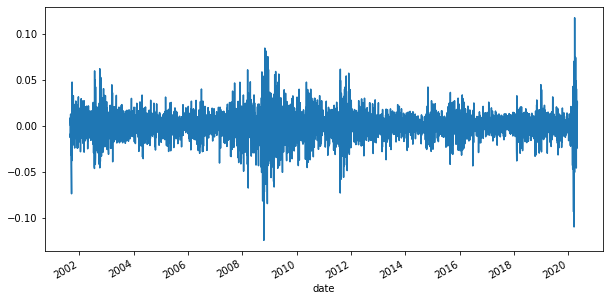

In [21]:
#plot daily returns of XLB

#concat_df['XLB_return'].plot(figsize=(10,5))
daily_returns_xlb.plot(figsize=(10,5))

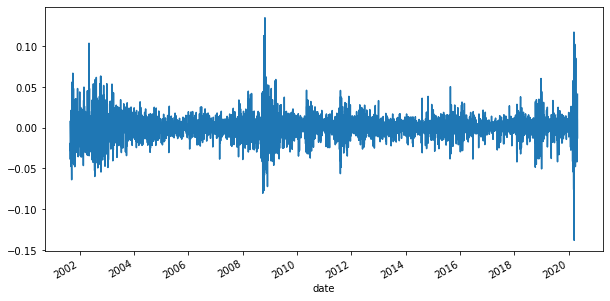

In [22]:
#plot daily returns of XLK

daily_returns_xlk.plot(figsize=(10,5))

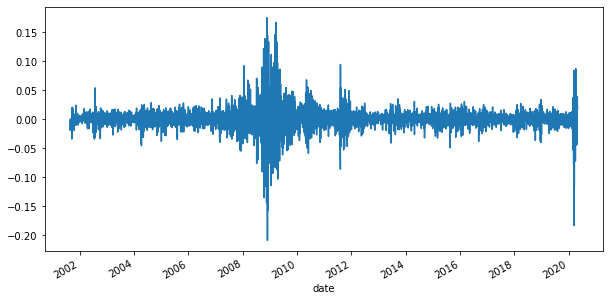

In [23]:
#plot daily returns of RWR

daily_returns_rwr.plot(figsize=(10,5))

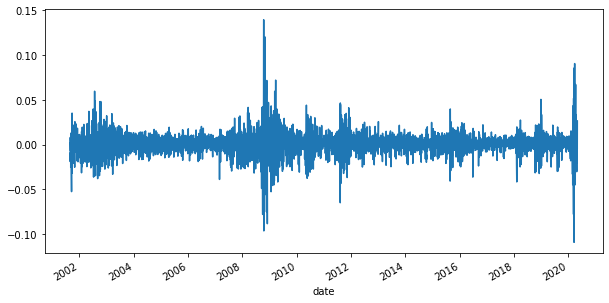

In [24]:
#plot daily returns of SPY

daily_returns_spy.plot(figsize=(10,5))

In [25]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns_xlb = (1 + concat_df['XLB_return']).cumprod()
cumulative_returns_xlk = (1 + concat_df['XLK_return']).cumprod()
cumulative_returns_rwr = (1 + concat_df['RWR_return']).cumprod()
cumulative_returns_spy = (1 + concat_df['SPY_return']).cumprod()

cumulative_returns_xlb.head()

date
2001-08-28    0.990576
2001-08-29    0.978016
2001-08-30    0.974426
2001-08-31    0.982951
2001-09-04    0.982951
Name: XLB_return, dtype: float64

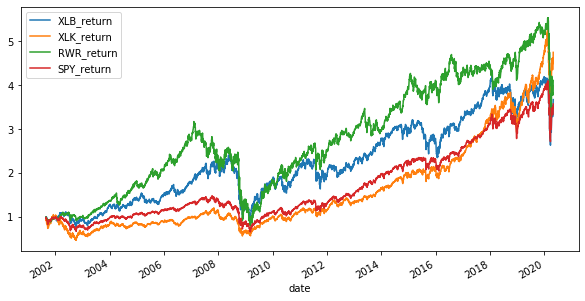

In [26]:
#plot cumulative returns

cumulative_returns_xlb.plot(figsize=(10,5),legend = True)
cumulative_returns_xlk.plot(figsize=(10,5),legend = True)
cumulative_returns_rwr.plot(figsize=(10,5),legend=True)
cumulative_returns_spy.plot(figsize=(10,5),legend=True)


In [27]:
# Calculate Standard Deviations for each sector
xlb_std = concat_df['XLB_return'].std()
print(f' XLB standard deviation is {xlb_std}')


xlk_std = concat_df['XLK_return'].std()
print(f' XLK standard deviation is {xlk_std}')

rwr_std = concat_df['RWR_return'].std()
print(f' RWR standard deviation is {rwr_std}')

spy_std = concat_df['SPY_return'].std()
print(f' SPY standard deviation is {spy_std}')


# Identify the sector with highest standard deviation (riskiest)
sectors = [xlb_std, xlk_std, rwr_std, spy_std]
sectors.sort()
print(sectors)

 XLB standard deviation is 0.01513730380343087
 XLK standard deviation is 0.01474639293043079
 RWR standard deviation is 0.018884423554688997
 SPY standard deviation is 0.012345520413289238
[0.012345520413289238, 0.01474639293043079, 0.01513730380343087, 0.018884423554688997]


In [28]:
# Calculate the annualized standard deviation (252 trading days) for each sector
annualized_xlb_std = xlb_std * np.sqrt(252)
annualized_xlb_std

annualized_xlk_std = xlk_std * np.sqrt(252)
annualized_xlk_std

annualized_rwr_std = rwr_std * np.sqrt(252)
annualized_rwr_std

annualized_spy_std = spy_std * np.sqrt(252)
annualized_spy_std


0.195979060915408

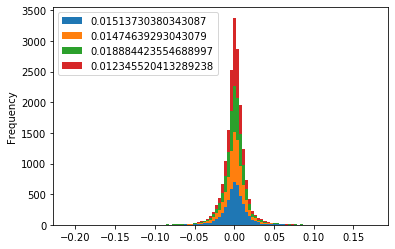

In [29]:
#Plot

sectors_std = pd.DataFrame({
    xlb_std: concat_df['XLB_return'],
    xlk_std: concat_df['XLK_return'],
    rwr_std: concat_df['RWR_return'],
    spy_std: concat_df['SPY_return']
})

sectors_std.plot.hist(stacked=True, bins=100)

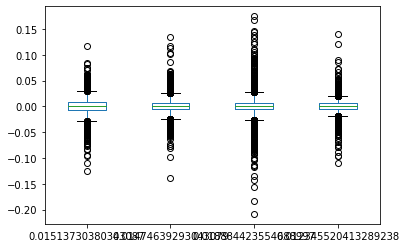

In [30]:
# Plot box plot
sectors_std.plot.box()

In [31]:
# Calculate Sharpe Ratios for the sectors

XLB_sharpe_ratio = (concat_df['XLB_return'].mean() * 252) / (concat_df['XLB_return'].std() * np.sqrt(252))

XLK_sharpe_ratio = (concat_df['XLK_return'].mean() * 252) / (concat_df['XLK_return'].std() * np.sqrt(252))

RWR_sharpe_ratio = (concat_df['RWR_return'].mean() * 252) / (concat_df['RWR_return'].std() * np.sqrt(252))

SPY_sharpe_ratio = (concat_df['SPY_return'].mean() * 252) / (concat_df['SPY_return'].std() * np.sqrt(252))

print(f" XLB: {XLB_sharpe_ratio}, XLK: {XLK_sharpe_ratio}, RWR:{RWR_sharpe_ratio}, SPY: {SPY_sharpe_ratio}")





 XLB: 0.411036703053281, XLK: 0.4739606273102433, RWR:0.4034346952199597, SPY: 0.44655436353367256


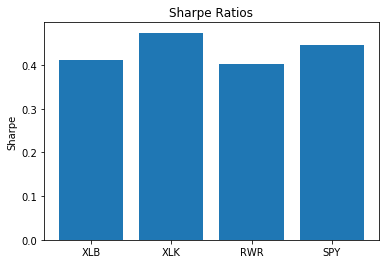

In [32]:
#Plot the sharpe ratios

objects = ('XLB', 'XLK', 'RWR', 'SPY')
y_pos = np.arange(len(objects))
sharpe = [XLB_sharpe_ratio,XLK_sharpe_ratio,RWR_sharpe_ratio, SPY_sharpe_ratio]

plt.bar(y_pos, sharpe, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Sharpe')
plt.title('Sharpe Ratios')

plt.show()

In [33]:
# Concat returns into one DataFrame
returns_only_df = pd.concat([daily_returns_xlb, daily_returns_xlk, daily_returns_rwr , daily_returns_spy], axis='columns', join='inner')
returns_only_df.head()

#Fix column names
columns = ['XLB_return', 'XLK_return', 'RWR_return', 'SPY_return']
returns_only_df.columns = columns
returns_only_df.head()

# Drop nulls
returns_only_df.dropna(inplace=True)

#count nulls 
returns_only_df.isnull().sum()






XLB_return    0
XLK_return    0
RWR_return    0
SPY_return    0
dtype: int64

In [34]:
#Check correlation

correlation = returns_only_df.corr()
correlation

,XLB_return,XLK_return,RWR_return,SPY_return
XLB_return,1.000000,0.729281,0.623023,0.844522
XLK_return,0.729281,1.000000,0.559509,0.894550
RWR_return,0.623023,0.559509,1.000000,0.700491
SPY_return,0.844522,0.894550,0.700491,1.000000


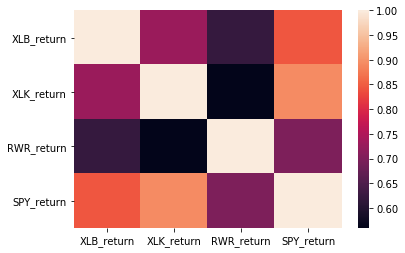

In [35]:
# Create a heatmap from the correlation values
sns.heatmap(correlation)

In [36]:
#BETA CALCULATION XLB and SPY

# Calculate covariance of XLB vs. S&P 500
covariance = returns_only_df['XLB_return'].cov(returns_only_df['SPY_return'])
covariance

# Calculate variance of S&P 500 returns
variance = returns_only_df['SPY_return'].var()
variance

# Calculate beta of XLB
XLB_beta = covariance / variance
XLB_beta

1.035499685297422

In [37]:
#BETA CALCULATION XLK and SPY

# Calculate covariance of XLK vs. S&P 500
covariance = returns_only_df['XLK_return'].cov(returns_only_df['SPY_return'])
covariance

# Calculate variance of S&P 500 returns
variance = returns_only_df['SPY_return'].var()
variance

# Calculate beta of XLK
XLK_beta = covariance / variance
XLK_beta

1.0685156693289222

In [38]:
#BETA CALCULATION RWR and SPY

# Calculate covariance of RWR vs. S&P 500
covariance = returns_only_df['RWR_return'].cov(returns_only_df['SPY_return'])
covariance

# Calculate variance of S&P 500 returns
variance = returns_only_df['SPY_return'].var()
variance

# Calculate beta of RWR
RWR_beta = covariance / variance
RWR_beta

1.071512379028517

A 10,000 investment in XLB would have grown to 36699.4516016118


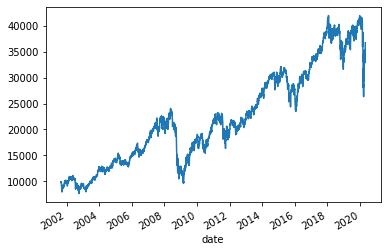

In [43]:
# Plot the returns of XLB in terms of money
initial_investment = 10000
cumulative_profit_xlb = initial_investment * cumulative_returns_xlb
print(f'A 10,000 investment in XLB would have grown to {cumulative_profit_xlb[-1]}')
cumulative_profit_xlb.plot()

A 10,000 investment in XLK would have grown to 47460.045072053195


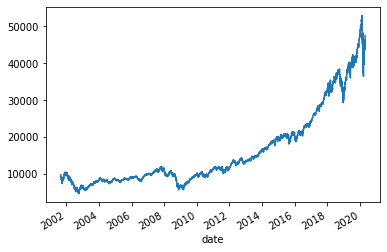

In [44]:
# Plot the returns of XLK in terms of money
initial_investment = 10000
cumulative_profit_xlk = initial_investment * cumulative_returns_xlk
print(f'A 10,000 investment in XLK would have grown to {cumulative_profit_xlk[-1]}')
cumulative_profit_xlk.plot()

A 10,000 investment in RWR would have grown to 41058.702005180334


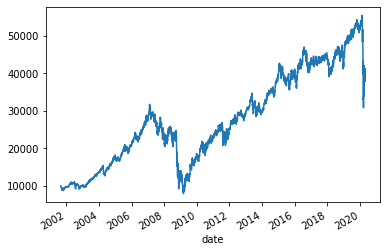

In [45]:
# Plot the returns of RWR in terms of money
initial_investment = 10000
cumulative_profit_rwr = initial_investment * cumulative_returns_rwr
print(f'A 10,000 investment in RWR would have grown to {cumulative_profit_rwr[-1]}')
cumulative_profit_rwr.plot()

A 10,000 investment in SPY would have grown to 35700.674904815576


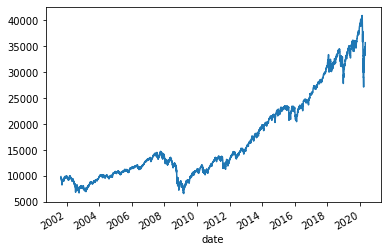

In [46]:
# Plot the returns of SPY in terms of money
initial_investment = 10000
cumulative_profit_spy = initial_investment * cumulative_returns_spy
print(f'A 10,000 investment in SPY would have grown to {cumulative_profit_spy[-1]}')
cumulative_profit_spy.plot()

In [47]:
#check concat_df
concat_df.head()


,XLB close,XLK close,RWR close,SPY close,XLB_return,XLK_return,RWR_return,SPY_return
date,,,,,,,,
2001-08-28,14.4324,18.8107,19.2651,80.9499,-0.009424,-0.027710,0.000000,-0.014370
2001-08-29,14.2494,18.4533,18.8996,80.1862,-0.012680,-0.019000,-0.018972,-0.009434
2001-08-30,14.1971,17.7384,18.8082,78.6589,-0.003670,-0.038741,-0.004836,-0.019047
2001-08-31,14.3213,17.8861,18.7625,79.2837,0.008748,0.008327,-0.002430,0.007943
2001-09-04,14.3213,17.4976,18.7321,78.7283,0.000000,-0.021721,-0.001620,-0.007005


In [49]:
# Set number of trading days and get last closing price of XLB from DataFrame
num_trading_days = 756
XLB_last_price = concat_df['XLB close'][-1]




In [ ]:
# Initialize the simulated prices list with the last closing price of XLB
simulated_XLB_prices = [XLB_last_price]

# Simulate the returns for 756 days
for i in range(num_trading_days):
    
# Calculate the simulated price using the last price within the list
     simulated_price = simulated_xlb_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
     # Append the simulated price to the list
     simulated_XLB_prices.append(simulated_price)
    
# # Create a DataFrame of the simulated prices
# simulated_price_df = pd.DataFrame({
#     "Simulated AAPL Prices": simulated_aapl_prices
# })

# # Print head of DataFrame
# simulated_price_df.head()